# DS 6021: Class Activity 1
## Randa Ampah

In [35]:
library(tidyverse)

## Activity 1: Migraine Drug Formulations

In [36]:
clinical = read.csv('Clinical_trial.csv')
head(clinical,5)

,Drug,Pain_Rating
,<chr>,<int>
1,A,4
2,A,5
3,A,4
4,A,3
5,A,2


### Question 1: Visualization

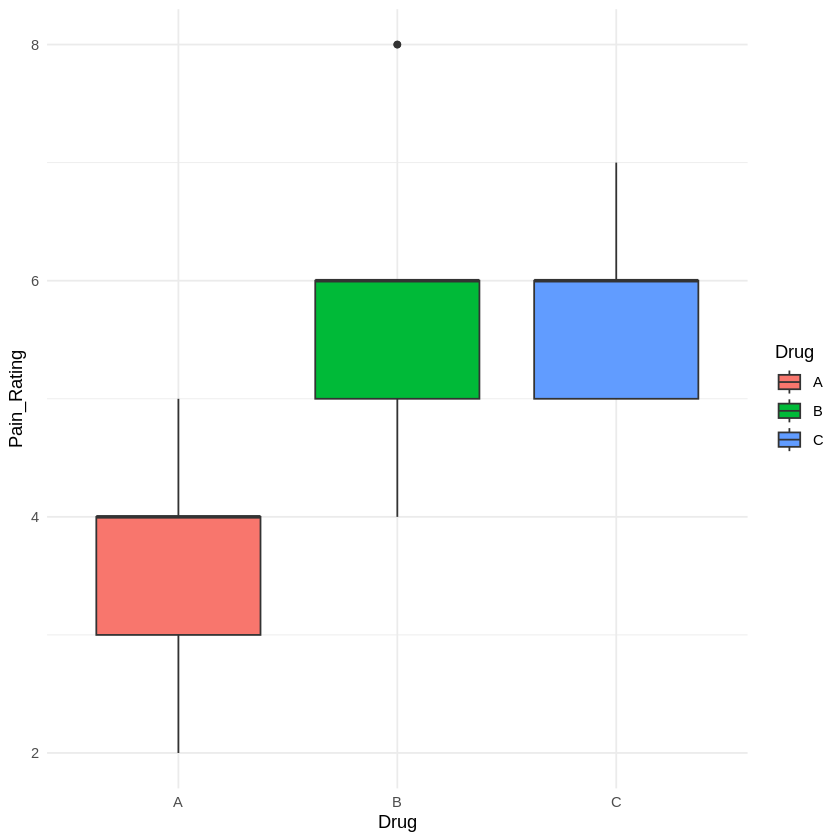

In [37]:
ggplot(clinical, aes(x = Drug, y = Pain_Rating, fill = Drug)) +
  geom_boxplot()+
  theme_minimal()

The graph suggests that drug A may cause a lower average pain rating than drugs B and C.

### Question 2: Statistical Test

The most appropriate test to conduct to determine which drug performs better, if any, is the ANOVA test, which is meant to compare more than 2 means.

The null hypothesis is that the average pain rating is the same across all drugs (A, B, and, C).

The alternate hypothesis is that there is at least one drug with an average pain rating that is different from the others.

In [38]:
anova_test = aov(Pain_Rating~Drug, data = clinical)
summary(anova_test)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Drug         2  28.22  14.111   11.91 0.000256 ***
Residuals   24  28.44   1.185                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The p-value for the ANOVA test is 0.000256,which is less than 0.05, meaning that we can reject the null hypothesis and that there is statistically significant evidence that at least one drug with a different average pain rating than the others.

A post-hoc Tukey test will be performed to identify which drug has the different average pain rating.

In [39]:
mult_comp = TukeyHSD(anova_test)
mult_comp

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Pain_Rating ~ Drug, data = clinical)

$Drug
         diff        lwr      upr     p adj
B-A 2.1111111  0.8295028 3.392719 0.0011107
C-A 2.2222222  0.9406139 3.503831 0.0006453
C-B 0.1111111 -1.1704972 1.392719 0.9745173


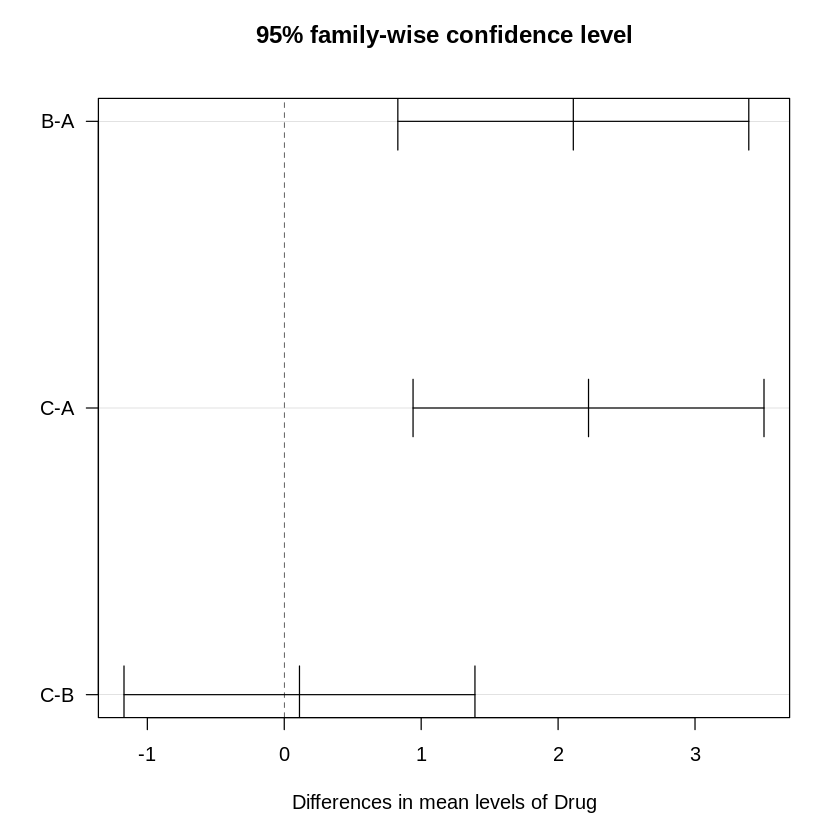

In [40]:
plot(mult_comp, las = 1)

The Tukey test revealed that drug A has a lower mean pain rating than drugs B and C. There is also no conclusive evidence of difference in mean pain rating between drugs B and C.

### Question 3: Discussion


The prediction goal would be to predict the actual pain rating depending on what drug has been taken for one person. A pharmaceutical company may prioritize inference over prediction, when they want to create a competitive drug that is overall more effective than others. They may prioritize prediction when they want to measure how effective the drug is for a specific person or group of people.

## Activity 2: Fast Food Promotion Strategies

In [41]:
marketing = read.csv('WA_Marketing-Campaign.csv')
head(marketing , 5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,1,Medium,1,4,3,1,33.73
2,1,Medium,1,4,3,2,35.67
3,1,Medium,1,4,3,3,29.03
4,1,Medium,1,4,3,4,39.25
5,1,Medium,2,5,2,1,27.81


### Question 1: Exploratory Data Analysis

#### Sales By Promotion (Boxplot)


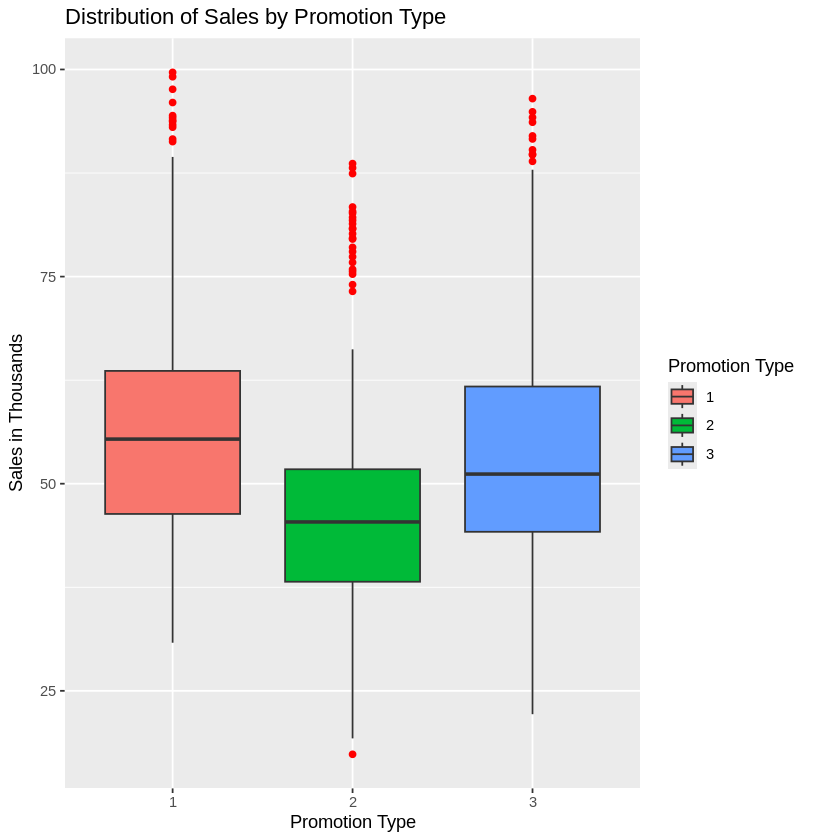

In [48]:
ggplot(marketing, aes(x=factor(Promotion), y=SalesInThousands, fill=factor(Promotion)))+
  geom_boxplot(outlier.color = 'red')+
  labs(title="Distribution of Sales by Promotion Type", x="Promotion Type",
 y="Sales in Thousands", fill='Promotion Type')

#### Sales By Promotion and Market Size (Grouped Boxplot)

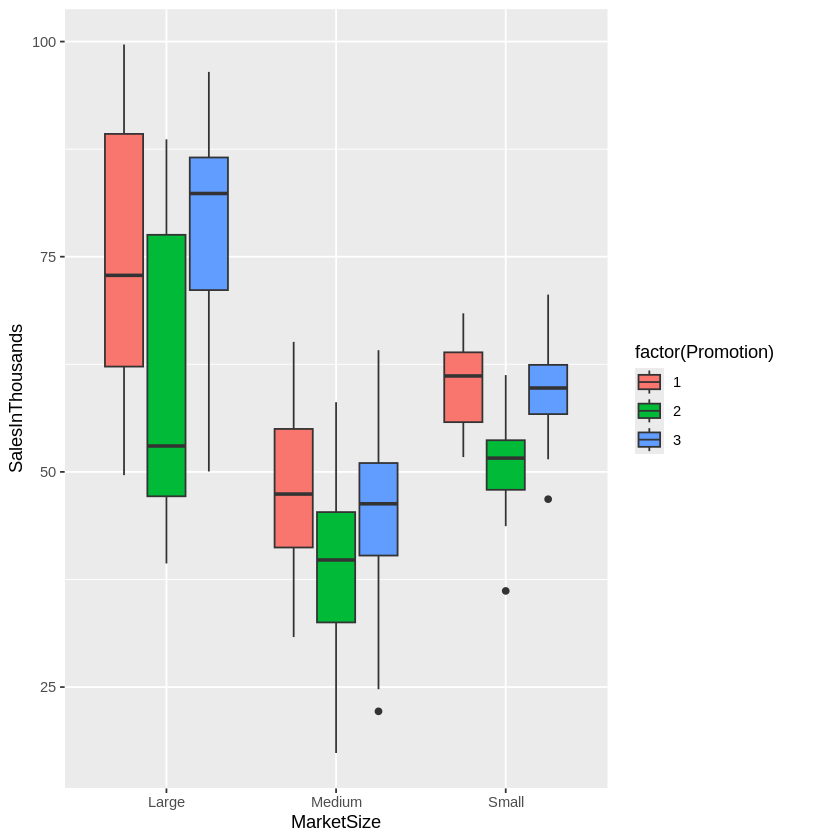

In [50]:
ggplot(marketing, aes(x=MarketSize, y=SalesInThousands, fill=factor(Promotion)))+
  geom_boxplot()

#### Weekly Sales Trends Across Promotions (Grouped Bar Graph)

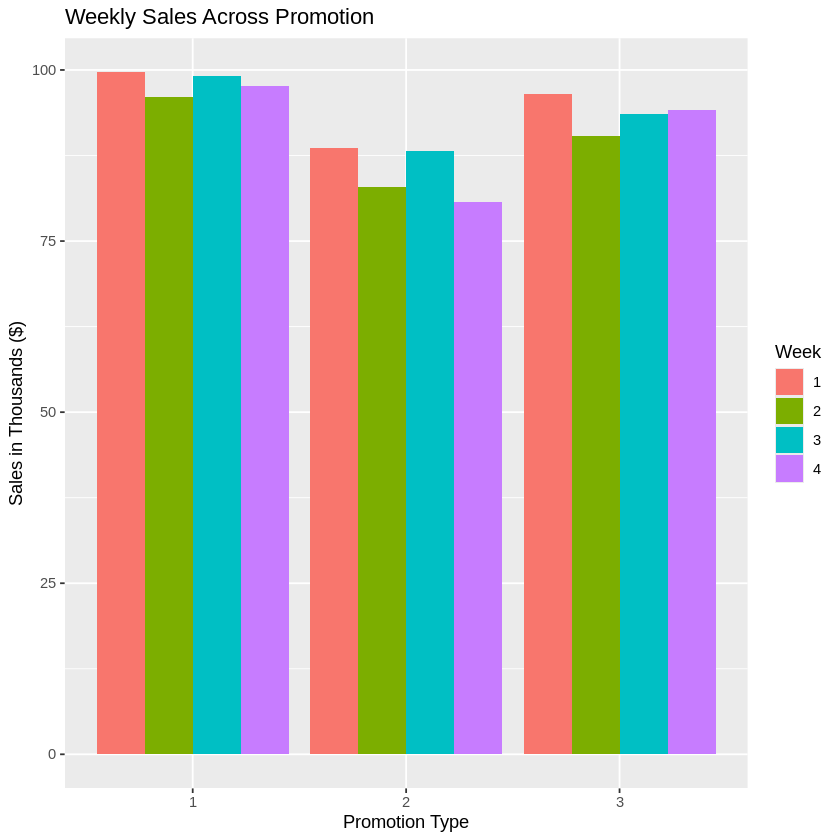

In [ ]:
ggplot(marketing, aes(x= factor(Promotion), y = SalesInThousands, fill = factor(week)))+
  geom_bar(stat = 'identity', position = 'dodge')+
  labs(title = 'Weekly Sales Across Promotion',
 x = 'Promotion Type', y = 'Sales in Thousands ($)', fill = 'Week')


### Question 2: Research Questions and Statistical Test

An interesting research question that could be explored is Is there a difference in the sales from different promotions at different market sizes? This could lead to conclusions about where to implement specific promotions based on characteristics of the store.

Broader questions would look at the promotions and market sizes themselves: Is there a significant difference in the average sales amount across the different promotions? Is there a difference in average sales across market sizes? Preliminary EDA in the boxplot graph suggests that promotion 1 possibly made more money on average than the others. The grouped boxplot suggests a possible trend across market sizes. These two questions can be confirmed or disproved through an ANOVA and possibly post-hoc Tukey test, which I will conduct below.

#### ANOVA

##### Promotion and Sales Amount: Is there a significant difference in average sales amount across promotions?
Since our first research question is about whether there is a difference in average sales amount across the promotions, the null hypothesis is that there is no difference in average sales amount across promotions. The alternate hypothesis is that at least one of the means is different from the others.

In [52]:
prom_anova = aov(SalesInThousands~Promotion, data = marketing)
summary(prom_anova)

             Df Sum Sq Mean Sq F value Pr(>F)
Promotion     1    538   538.4   1.921  0.166
Residuals   546 153025   280.3               

The ANOVA test resulted in a p-value of 0.166, which is greater than 0.05, meaning we fail to reject the null hypothesis. We have no significant evidence that the average sales amount is different across promotions, which means that no one promotion is "better" than another on its own and we would have to include other factors to see if they influence the sales amounts.

##### Market Size and Sales Amount: Is there a difference in average sales across market sizes?
The null hypothesis for this question is that there is no difference in average sales amount across market sizes. The alternate hypothesis is that at least one of the market sizes has a different average sales amount.

In [53]:
market_anova = aov(SalesInThousands~MarketSize, data = marketing)
summary(market_anova)

             Df Sum Sq Mean Sq F value Pr(>F)    
MarketSize    2  76273   38136   268.9 <2e-16 ***
Residuals   545  77290     142                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The ANOVA test resulted in a p-value less than 0.001, meaning that we reject the null hypothesis and that there is statistically significant evidence that there is at least one market size that has a different average sales amount from the others. In order to ascertain which market size(s) has the different mean, a Tukey test will be performed.

In [56]:
mult_comp = TukeyHSD(market_anova)
mult_comp

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SalesInThousands ~ MarketSize, data = marketing)

$MarketSize
                  diff        lwr        upr p adj
Medium-Large -26.13138 -28.797853 -23.464911     0
Small-Large  -12.70739 -16.916536  -8.498249     0
Small-Medium  13.42399   9.486696  17.361283     0


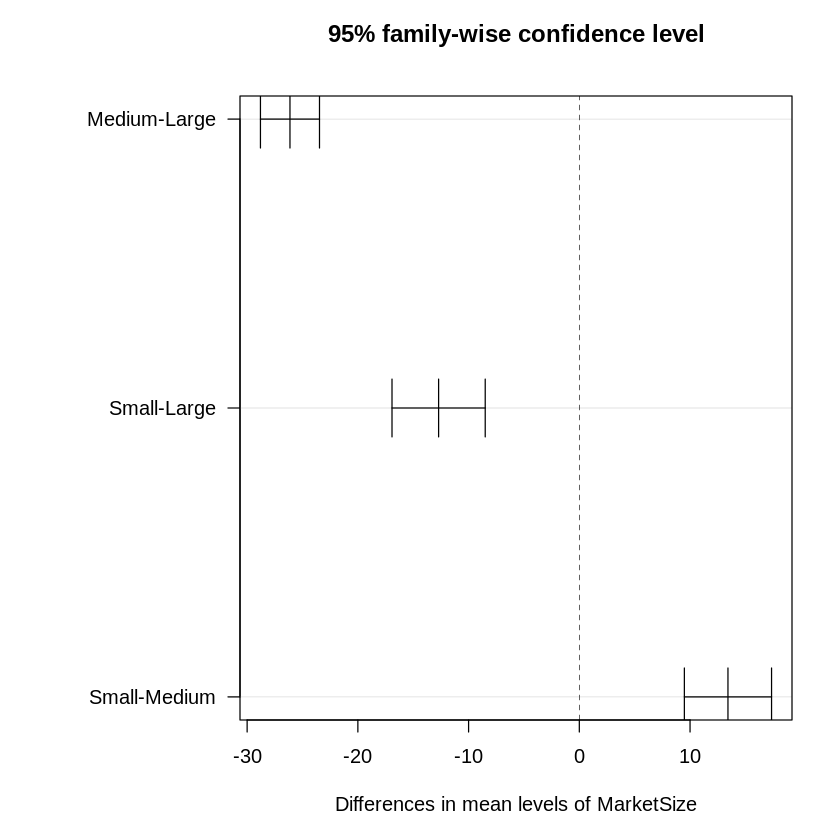

In [59]:
par(mar = c(5,10,4,2))
plot(mult_comp, las = 1)

The Tukey test revealed that there is a significant difference in the means of all of the pairwise market sizes. The large market size has a higher average sales amount than both the small and medium market sizes, which makes sense. An interesting result is that the small market size had a higher average sales amount than the medium size.

### Question 3: Discussion

The chain may emphasize inference versus prediction because they want understand more about how their customers interact with them, in terms of purchasing, with or without promotions, and across their other factors. Understaing their customers' behaviors can. help them make more informed business choices. Prediction may be more necessary if they wanted to target a specific audience with their promotions.



Older stores (higher store age) could have more rapport/trust within the community, which would lead customers to be more inclined to participate in promotions, therefore increasing overall sales, since people can be more drawn to the familiar.